In [2]:
import cv2
import pytesseract as tess
import numpy as np
import matplotlib.pyplot as plt
import time
from imutils import contours as sortCnt

In [3]:
cap = cv2.VideoCapture("0 - 2020-01-12 06-42-00-715.mov")
totalFrames = cap.get(cv2.CAP_PROP_FRAME_COUNT)
totalFrames

2308.0

In [4]:
cap.set(cv2.CAP_PROP_POS_FRAMES,1250+250)

True

(576, 704, 3)


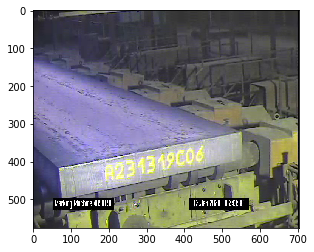

In [5]:
ret, frame = cap.read()
imgIP = "refImage.jpg"
#frame = cv2.imread(imgIP)
frame = cv2.cvtColor(frame,cv2.COLOR_BGR2RGB)
#test = frame.copy()
print(frame.shape)
#plt.figure(figsize=(10,12))
plt.imshow(frame)

In [6]:
#cv2.imwrite("templateWithMarking.jpg",frame[300:470,30:550])

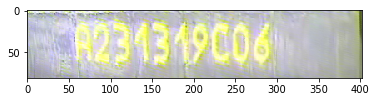

In [7]:
#pts1 = np.float32([[298,407],[630+20,344],[298,488],[630+20,407]])
#pts2 = np.float32([[0,0],[1800,0],[0,500],[1800,500]])

#1----------2
#-          -
#-          -
#3----------4

pts1 = np.float32([[115,417-7],[509,340-7],[115,490],[509,400]])
pts2 = np.float32([[0,0],[352,0],[0,81],[352,81]])

M = cv2.getPerspectiveTransform(pts1,pts2)

#dst = cv2.warpPerspective(allFrames[-450],M,(352,81))
dst = cv2.warpPerspective(frame,M,(402,81))

plt.imshow(dst,"gray")

In [8]:
#cv2.imwrite("blankSlab.jpg",dst)

In [9]:
img = cv2.cvtColor(dst.copy(),cv2.COLOR_BGR2RGB)
r,g,b = cv2.split(img.copy()) 
hsv = cv2.cvtColor(img.copy(),cv2.COLOR_RGB2HSV)
hh,s,v = cv2.split(hsv)
yuv = cv2.cvtColor(img.copy(),cv2.COLOR_RGB2YUV)
y,u,vb = cv2.split(yuv)


hls = cv2.cvtColor(img.copy(),cv2.COLOR_RGB2HLS)
h,l,ss = cv2.split(hls)


In [10]:
#%matplotlib notebook

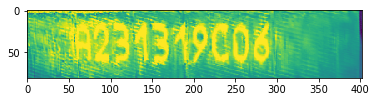

In [11]:
plt.imshow(v)

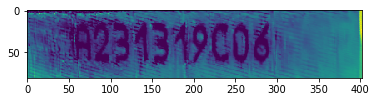

In [12]:
blankSlab = cv2.imread("blankSlab.jpg",0)

blankSlab = cv2.resize(blankSlab,(blankSlab.shape[1]*2,blankSlab.shape[0]*2), cv2.INTER_AREA)
dst = cv2.resize(dst,(dst.shape[1]*2,dst.shape[0]*2), cv2.INTER_AREA)

dstGray = cv2.cvtColor(dst,cv2.COLOR_RGB2GRAY)

hsv_ = cv2.cvtColor(img.copy(),cv2.COLOR_RGB2HSV)
hh_,s_,v_ = cv2.split(hsv_)

#diff = cv2.bitwise_not( dstGray, blankSlab)
diff = cv2.bitwise_not( v, v_)
print(tess.image_to_string(diff))
plt.imshow(diff)

In [13]:
#%matplotlib notebook

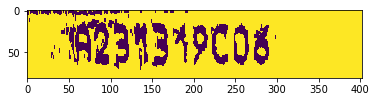

In [14]:
gray = cv2.cvtColor(dst,cv2.COLOR_RGB2GRAY)
_,x = cv2.threshold(diff,5,255,cv2.THRESH_BINARY)
adThresh = cv2.adaptiveThreshold(diff,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY ,191*3,25)
erosion = cv2.erode(x,(3,3),iterations = 3)
plt.imshow(erosion)

In [20]:
blank = np.zeros(erosion.shape)
_ , contours, hierarchy =   cv2.findContours(erosion.copy(),cv2.RETR_CCOMP,cv2.CHAIN_APPROX_SIMPLE)
cnts = sorted(contours, key = cv2.contourArea,reverse= True)
# cntr Order
#print(len(cnts))

'''epsilon = 0.0001*cv2.arcLength(cnts[0],True)
approx = cv2.approxPolyDP(cnts[0],epsilon,True)'''
for i in range(len(cnts)):
    print(cv2.contourArea(cnts[i]))
#
cnts, bBox = sortCnt.sort_contours(cnts[1:11])
#print(cnts)
print(cv2.contourArea(cnts[-1]),"___")

31435.5
1647.0
764.0
700.0
680.5
656.5
580.0
520.5
470.5
362.0
235.0
83.5
75.0
75.0
69.0
43.0
37.0
34.5
28.0
18.5
16.5
16.0
13.0
13.0
13.0
12.0
10.0
10.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
8.0
2.0
1.0
0.5
0.0
0.0
0.0
0.0
0.0
0.0
0.0
680.5 ___


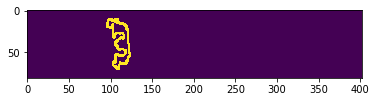

In [15]:
ordr = 1
dstCnt = cv2.drawContours(blank.copy(),cnts,ordr,(255),2)
plt.imshow(dstCnt)

In [16]:
bBox

((50, 10, 50, 57),
 (96, 10, 28, 61),
 (127, 13, 19, 52),
 (149, 14, 21, 55),
 (174, 15, 20, 49),
 (198, 17, 20, 49),
 (221, 16, 21, 50),
 (247, 15, 20, 52),
 (250, 27, 12, 28),
 (272, 16, 20, 50))

In [17]:
#np.save("imgPoints.npy",bBox)

In [18]:
c = np.load("ocrPoints.npy")
c

array([[100,  17,  80, 120],
       [153,  13,  58, 127],
       [202,  17,  57, 120],
       [253,  13,  55, 127],
       [297,  17,  55, 120],
       [350,  13,  55, 127],
       [390,  17,  57, 120],
       [441,  13,  50, 127],
       [490,  17,  49, 120],
       [537,  13,  60, 127]])

In [19]:
# --psm 13 it should works, because it will consider it as a raw text line, without searching for pages and paragraphs.
for i in c:
    #x = erosion[i[1]-11:i[1]+120,i[0]-5:i[0]+44] # GOOD
    
    #x = erosion[i[1]-15:i[1]+125,i[0]-10:i[0]+50] # with imgPoints.npy
    x = erosion[i[1]:i[1]+i[3],i[0]:i[0]+i[2]]
    ocr = tess.image_to_string(x, lang = 'eng' , config="--psm 13 --oem 1 -c tessedit_char_whitelist=0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ",)
    if ocr == "":
        ocr = "_"
    print(ocr)
    cv2.imshow("sbjhkj",x)
    cv2.waitKey(0)
cv2.destroyAllWindows()

13
345
AC
_
_
_
_


SystemError: tile cannot extend outside image

In [ ]:
print(tess.image_to_string(erosion, config="--psm 13",timeout=500))

In [ ]:
break

In [ ]:
c[0][0] = 100
c

In [ ]:
c[2:4]

In [ ]:
i = c[1]

In [ ]:
i = [540 ,17,60,120]

In [ ]:
438+50

In [ ]:
dst = cv2.rectangle(dst.copy(),(i[0],i[1]),(i[0]+i[2],i[1]+i[3]),(0,0,255),1)
text = tess.image_to_string(x, lang = 'eng' , config="--psm 13 --oem 1 -c tessedit_char_whitelist=0123456789ABCDEFGHIJKLMNOPQRSTUVWXYZ")
print(text)
cv2.imshow("sbjhkj",dst)
cv2.waitKey(0)
cv2.destroyAllWindows()
#plt.imshow(dst)

In [ ]:
ocrPoints = [[100,17,80,120],[153,13,58,120 + 7],
             [202,17,57,120],[253,13,55,120 + 7],
             [297,17,55,120],[350,13,55,120 + 7],
             [390,17,57,120],[441,13,50,120 + 7],
             [490,17,49,120],[537,13,60,120 + 7]]

In [ ]:
#np.save("ocrPoints.npy",ocrPoints)

In [ ]:
print(tess.image_to_string(erosion, config="--psm 13",timeout=500))

In [ ]:
len("ADBARRSCO1")

In [ ]:
while(True):
    ret, img = cap.read()
    
    pts1 = np.float32([[115,417],[509,340],[115,490],[509,400]])
    pts2 = np.float32([[0,0],[352,0],[0,81],[352,81]])

    M = cv2.getPerspectiveTransform(pts1,pts2)

    #dst = cv2.warpPerspective(allFrames[-450],M,(352,81))
    dst = cv2.warpPerspective(img,M,(402,81))
    dst_2 = cv2.resize(dst,(dst.shape[1]*2,dst.shape[0]*2), cv2.INTER_AREA)
    
    cv2.imshow('img ',dst)
    cv2.imshow("full",img)
    cv2.imshow("2x",dst_2)
    time.sleep(0.09)
   
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# When everything done, release the capture
cap.release()
cv2.destroyAllWindows()